#### Create model based on cleaned data

#### Note - must run data cleaning and Matlab resampling prior to training

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('Sensors.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'time']

flow = pd.read_csv('Flow.csv')
flow.columns = ['Time', 'Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,time
0,0.48848,0.45212,0.45455,0.46667,0.00000,-0.11800,0.000000,0.118000,1907.7
1,0.47879,0.44483,0.44970,0.46586,-0.34000,-0.37021,-0.170000,0.039061,1907.7
2,0.47383,0.44113,0.45092,0.45693,-0.41611,-0.37795,-0.066729,-0.277740,1907.7
3,0.47085,0.43791,0.45166,0.45844,-0.38164,-0.36635,-0.021175,-0.100250,1907.7
4,0.46887,0.43576,0.45214,0.45944,-0.33519,-0.33422,-0.001462,-0.021982,1907.7


In [6]:
flow.head()

,Time,Flow
0,1924.8,-0.52471
1,1898.8,-0.51793
2,1913.6,-0.52156
3,1904.4,-0.51885
4,1910.5,-0.52035


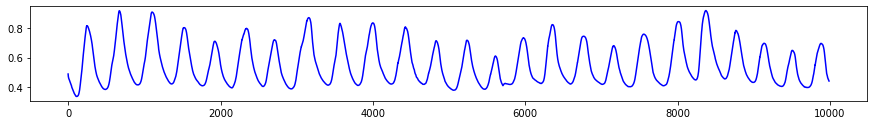

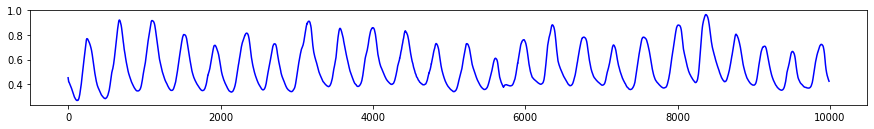

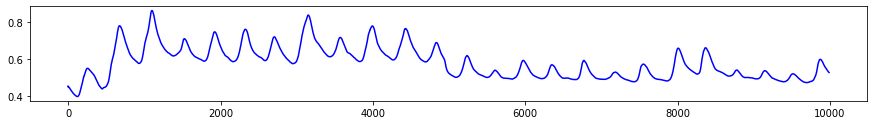

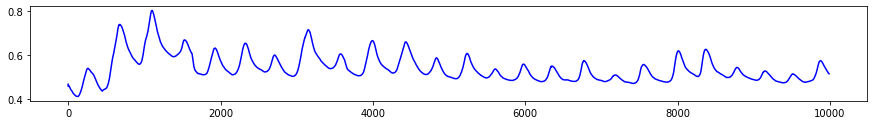

In [7]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

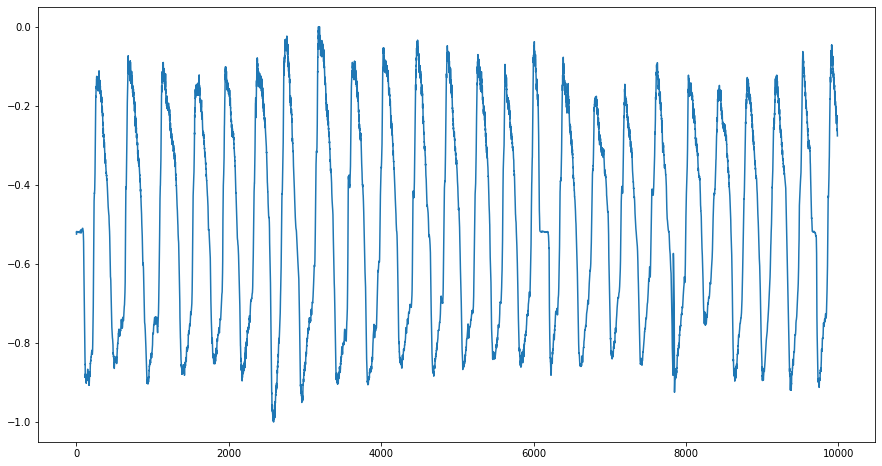

In [8]:
fig = plt.figure(figsize = (15, 8))
plt.plot(flow['Flow'])

In [12]:
def label_fix(label):
    if label < -0.7:
        return 0
    elif label > -0.25:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [13]:
df.head()

,1,2,3,4,d1,d2,d3,d4,time,Class
0,0.48848,0.45212,0.45455,0.46667,0.00000,-0.11800,0.000000,0.118000,1907.7,2
1,0.47879,0.44483,0.44970,0.46586,-0.34000,-0.37021,-0.170000,0.039061,1907.7,2
2,0.47383,0.44113,0.45092,0.45693,-0.41611,-0.37795,-0.066729,-0.277740,1907.7,2
3,0.47085,0.43791,0.45166,0.45844,-0.38164,-0.36635,-0.021175,-0.100250,1907.7,2
4,0.46887,0.43576,0.45214,0.45944,-0.33519,-0.33422,-0.001462,-0.021982,1907.7,2


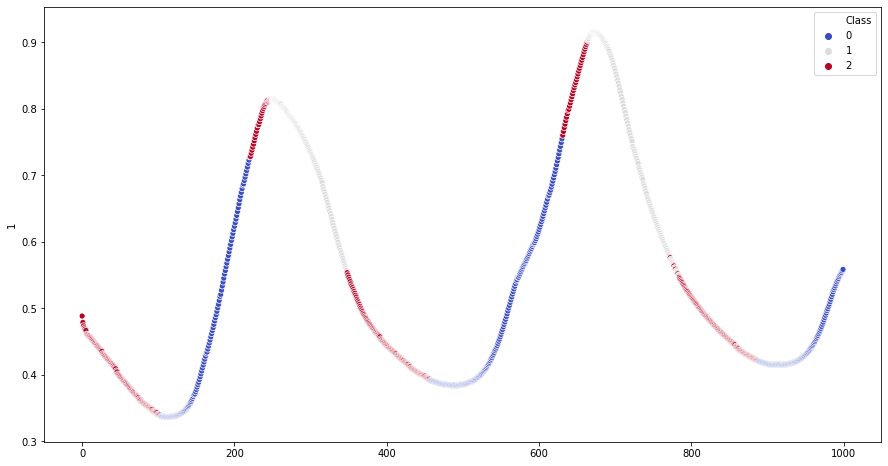

In [14]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = df['1'][0:1000], x = range(0, 1000), hue = df['Class'][0:1000], palette = 'coolwarm')

In [15]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('time', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [16]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

W1105 09:02:34.832971 4478000576 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1350      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                7550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 9,053
Trainable params: 9,053
Non-trainable params: 0
_________________________________________________________________


In [17]:
EPOCHS = 50
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/50
6991/6991 [==============================] - 0s 46us/sample - loss: 0.7372 - acc: 0.6710
Epoch 2/50
6991/6991 [==============================] - 0s 24us/sample - loss: 0.4851 - acc: 0.7902
Epoch 3/50
6991/6991 [==============================] - 0s 24us/sample - loss: 0.4294 - acc: 0.8186
Epoch 4/50
6991/6991 [==============================] - 0s 24us/sample - loss: 0.4123 - acc: 0.8262
Epoch 5/50
6991/6991 [==============================] - 0s 24us/sample - loss: 0.3985 - acc: 0.8312
Epoch 6/50
6991/6991 [==============================] - 0s 23us/sample - loss: 0.3876 - acc: 0.8339
Epoch 7/50
6991/6991 [==============================] - 0s 23us/sample - loss: 0.3780 - acc: 0.8422
Epoch 8/50
6991/6991 [==============================] - 0s 24us/sample - loss: 0.3733 - acc: 0.8454
Epoch 9/50
6991/6991 [==============================] - 0s 23us/sample - loss: 0.3661 - acc: 0.8464
Epoch 10/50
6991/6991 [==============================] - 0s 23us/sample - loss: 0.3611 - acc: 0.8444

In [18]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2997/2997 [==============================] - 0s 23us/sample - loss: 0.2651 - acc: 0.8869
Test accuracy: 0.8868869
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1035
           1       0.90      0.90      0.90       729
           2       0.87      0.85      0.86      1233

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



In [47]:
keras_file = "model.h5"

In [48]:
keras.models.save_model(model, keras_file)

In [49]:
converter = tf.lite.TocoConverter.from_keras_model_file('my_model.h5')

W1104 15:45:48.750565 4785634752 deprecation.py:323] From <ipython-input-49-ac0a8c68a144>:1: TocoConverter.from_keras_model_file (from tensorflow.lite.python.lite) is deprecated and will be removed in a future version.
Instructions for updating:
Use `lite.TFLiteConverter.from_keras_model_file` instead.
W1104 15:45:48.759294 4785634752 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1104 15:45:48.760410 4785634752 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for

In [50]:
tflite_model = converter.convert()

In [52]:
open("model.tflite", "wb").write(tflite_model)

37580